# WeatherPy

In [2]:
#Dependencies
import requests
import json
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from scipy import stats
from citipy import citipy

# Import API key
from api_keys import weather_api_key

## Generate Cities List

The aim of this code was to create as much of an even distribution of cities across the globe as possible. The cities datalist is divided into 4 quadrants taking random latitudes and longitutes from the Northern, Southern, Eastern and Western hemispheres. Lists of 150 cities from each quadrant were generated separately. This was done as 90% of the worlds population and land mass exist in the Northern hemisphere so the likelyhood of generating unique Southern hemisphere cities in a single list using the citipy library is reduced.

In [3]:
#geographical coordinates divided into 4 sections to obtain most equal spread of cities, to make the citipy library work faster the latitudes have been capped at the northern and southern most cities in the world to prevent getting too much ocean or uninhabitated land 
lats = [(0,79),(0,79), (-54,0), (-54,0)]
longs = [(0,180),(-180,0),(0,180),(-180,0)]

In [4]:
#function to make lists of unique city/country combinations from above coordinates evenly split across each section
#np.random.uniform is used to ensure selection follows uniform distribution not normal distribution
def makelists(x,listname):
    while len(listname) < 150:
        lat = np.random.uniform(lats[x][0],lats[x][1])  
        lon = np.random.uniform(longs[x][0],longs[x][1])
        city = citipy.nearest_city(lat, lon).city_name
        country = citipy.nearest_city(lat, lon).country_code
        listname.append((city, country))
        listname = list(set(listname))
    return(listname)





In [5]:
#create 4 sets of cities using makelists function, to ensure as even a spread across sections as possible
cities = {}

for i in range(4):
    name = "city" +str(i)
    listn = []
    listn = makelists(i,listn)
    cities[name] = listn
    


## Perform API Calls
This requires user to provide own API key in api_keys.py

In [6]:
#API calls on each dictionary
print("Begining of Data Retrieval\n-----------------")
cities2 = []
lat = []
lon = []
maxtemp = []
humidity = []
cloudiness =[]
wind = []
country = []
date = []
i = 1
j = 1
for key,values in cities.items():
    for city in values:

        url = f"http://api.openweathermap.org/data/2.5/weather?q={city[0]},{city[1]}&units=imperial&appid={weather_api_key}"  
        data = requests.get(url).json()
   
        try:

            lat.append(data["coord"]["lat"])
            lon.append(data["coord"]["lon"])
            maxtemp.append(data["main"]["temp_max"])
            humidity.append(data["main"]["humidity"])
            cloudiness.append(data["clouds"]["all"])
            wind.append(data["wind"]["speed"])
            country.append(data["sys"]["country"])
            date.append(data["dt"])
        except: 
            message = data["message"]
            print(f"{message.capitalize()}. Skipping...")     
        else:
            print(f"Processing Record {i} of Set {j} | {city[0]}")
            cities2.append(city[0])
            #cities2 = list(set(cities2))
            i +=1
    j +=1   
print("-----------------\nData Retrieval Complete \n-----------------")
#creates dictionary of weather data    
citiesdata = {
    'City': cities2,
    'Lat': lat, 
    'Lng': lon, 
    "Max Temp" : maxtemp, 
    "Humidity" : humidity, 
    "Cloudiness" : cloudiness, 
    "Wind Speed": wind, 
    "Country": country,
    "Date" : date
}


Begining of Data Retrieval
-----------------
Processing Record 1 of Set 1 | magadan
Processing Record 2 of Set 1 | talaja
Processing Record 3 of Set 1 | nikolskoye
Processing Record 4 of Set 1 | troitskoye
Processing Record 5 of Set 1 | panacan
Processing Record 6 of Set 1 | orlovskiy
City not found. Skipping...
Processing Record 7 of Set 1 | weligama
Processing Record 8 of Set 1 | altay
Processing Record 9 of Set 1 | mandera
Processing Record 10 of Set 1 | san policarpo
Processing Record 11 of Set 1 | lazarev
Processing Record 12 of Set 1 | itoman
Processing Record 13 of Set 1 | bhandara
Processing Record 14 of Set 1 | longyan
Processing Record 15 of Set 1 | ninghai
Processing Record 16 of Set 1 | konstantinovka
Processing Record 17 of Set 1 | seljord
Processing Record 18 of Set 1 | benghazi
Processing Record 19 of Set 1 | balabac
City not found. Skipping...
City not found. Skipping...
Processing Record 20 of Set 1 | pevek
Processing Record 21 of Set 1 | kurumkan
Processing Record 22 

Processing Record 179 of Set 2 | bethel
Processing Record 180 of Set 2 | marquette
Processing Record 181 of Set 2 | cabo san lucas
Processing Record 182 of Set 2 | nome
Processing Record 183 of Set 2 | lamar
Processing Record 184 of Set 2 | hamilton
Processing Record 185 of Set 2 | la ronge
Processing Record 186 of Set 2 | atar
Processing Record 187 of Set 2 | fortuna
Processing Record 188 of Set 2 | parrita
Processing Record 189 of Set 2 | fairbanks
Processing Record 190 of Set 2 | husavik
Processing Record 191 of Set 2 | hilo
Processing Record 192 of Set 2 | barrow
City not found. Skipping...
Processing Record 193 of Set 2 | atuona
Processing Record 194 of Set 2 | cervo
Processing Record 195 of Set 2 | port hawkesbury
Processing Record 196 of Set 2 | vila franca do campo
Processing Record 197 of Set 2 | penzance
Processing Record 198 of Set 2 | clyde river
Processing Record 199 of Set 2 | arona
Processing Record 200 of Set 2 | haines junction
Processing Record 201 of Set 2 | nicoya
P

Processing Record 363 of Set 3 | maltahohe
Processing Record 364 of Set 3 | bisho
Processing Record 365 of Set 3 | karasburg
Processing Record 366 of Set 3 | samarai
Processing Record 367 of Set 3 | cuamba
Processing Record 368 of Set 3 | angoche
Processing Record 369 of Set 3 | port pirie
Processing Record 370 of Set 3 | bredasdorp
Processing Record 371 of Set 3 | emerald
Processing Record 372 of Set 3 | northam
City not found. Skipping...
Processing Record 373 of Set 3 | ahipara
Processing Record 374 of Set 3 | carnarvon
Processing Record 375 of Set 3 | ambulu
Processing Record 376 of Set 3 | welkom
Processing Record 377 of Set 3 | hervey bay
City not found. Skipping...
Processing Record 378 of Set 3 | karratha
Processing Record 379 of Set 3 | honiara
Processing Record 380 of Set 3 | madang
Processing Record 381 of Set 3 | kieta
Processing Record 382 of Set 3 | boyolangu
Processing Record 383 of Set 3 | walvis bay
Processing Record 384 of Set 3 | flinders
Processing Record 385 of Set

## Converts API Data to DataFrame
   


In [7]:
#converts weather dictionary to dataframe removing duplicated city and country pairs
df1 = pd.DataFrame(citiesdata)
initial = len(df1)
df1.drop_duplicates(subset=['City','Country'], keep= 'first', inplace=True)
final = len(df1)

print(f"{initial - final} duplicate city/country pairs were removed")


9 duplicate city/country pairs were removed


In [8]:
#display data frame head
df1.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,magadan,59.5667,150.8000,33.62,88,99,28.34,RU,1618911179
1,talaja,21.3500,72.0500,93.20,40,75,14.97,IN,1618911390
2,nikolskoye,59.7035,30.7861,52.00,25,0,13.42,RU,1618911390
3,troitskoye,52.9821,84.6757,26.47,55,100,7.23,RU,1618911391
4,panacan,9.2463,118.4082,87.80,62,20,6.91,PH,1618911391


In [9]:
#calculate and display summary statistic
df1.describe().style.format({'Lat':'{:.2f}','Lng':'{:.2f}','Max Temp':'{:.2f}','Humidity':'{:.2f}','Cloudiness':'{:.2f}', 'Wind Speed':'{:.2f}' ,'Date':"{:.0f}"})


,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,535.00,535.00,535.00,535.00,535.00,535.00,535
mean,9.79,6.96,62.22,71.64,54.53,8.13,1618911403
std,34.44,93.38,20.28,22.27,39.19,5.88,94
min,-54.80,-175.20,-4.54,1.00,0.00,0.07,1618911112
25%,-19.80,-67.51,50.00,61.00,13.50,3.44,1618911405
50%,-0.74,-4.43,67.05,77.00,65.00,6.60,1618911432
75%,40.83,97.26,77.00,88.00,93.00,11.63,1618911461
max,77.48,173.17,104.00,100.00,100.00,29.93,1618911498


 ## Inspects and removes data if humidity is over 100%

In [10]:
#cleans data if humidity is greater than 100%
if df1["Humidity"].max() > 100:
    over100 = (df1[df1["Humidity"]>100]).index
    clean_city_data = df1.drop(over100, inplace = False)
    droppedcities = df1.loc[over100]["City"]
    print(", ".join(droppedcities) + " have been removed as humidity was >100%")
else:
    clean_city_data = df1

#save to csv    
clean_city_data.to_csv("cityweatherdata.csv", encoding = "utf-8", index=False)

## Plotting Data

In [11]:
#gets date of data
date = datetime.fromtimestamp(clean_city_data["Date"].max()).strftime("%d/%m/%y")
date

'20/04/21'

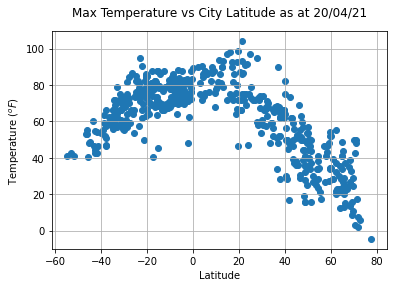

In [22]:
# Temp vs Lat scatter plot
plt.scatter(clean_city_data["Lat"], clean_city_data["Max Temp"], marker="o")
plt.title(f"Max Temperature vs City Latitude as at {date}", pad=15)
plt.ylabel("Temperature ($^oF$)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("TemperaturevCitiesLatitude.png")

# Show plot
plt.show()


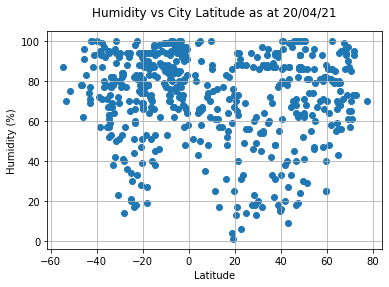

In [23]:
# Humidity vs Lat scatter plot
plt.scatter(clean_city_data["Lat"], clean_city_data["Humidity"], marker="o")
plt.title(f"Humidity vs City Latitude as at {date}", pad=15)
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("HumidityvCitiesLatitude.png")

# Show plot
plt.show()

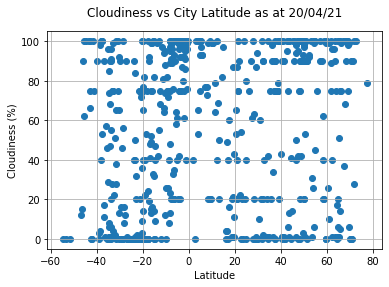

In [24]:
# Cloudiness vs Lat scatter plot
plt.scatter(clean_city_data["Lat"], clean_city_data["Cloudiness"], marker="o")
plt.title(f"Cloudiness vs City Latitude as at {date}", pad=15)
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("CloudinessvCitiesLatitude.png")

# Show plot
plt.show()

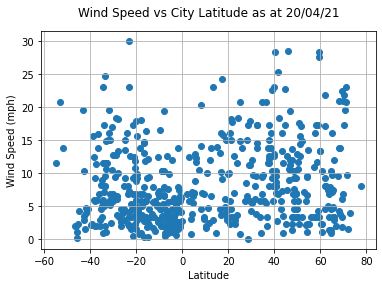

In [25]:
# Wind Speed vs Lat scatter plot
plt.scatter(clean_city_data["Lat"], clean_city_data["Wind Speed"], marker="o")
plt.title(f"Wind Speed vs City Latitude as at {date}", pad=15)
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("WindSpeedvCitiesLatitude.png")

# Show plot
plt.show()

## Linear Regressions

In [26]:
#divides dataframes into northern and southern hemisphere cities
northerncities = clean_city_data[clean_city_data["Lat"] >= 0]
southerncities = clean_city_data[clean_city_data["Lat"] < 0]

In [27]:
#shows even distribution of cities in each hemisphere
print(f"Number of cities in Northern Hemisphere dataset: {len(northerncities)}\nNumber of cities in Southern Hemisphere dataset: {len(southerncities)}")

Number of cities in Northern Hemisphere dataset: 265
Number of cities in Southern Hemisphere dataset: 270


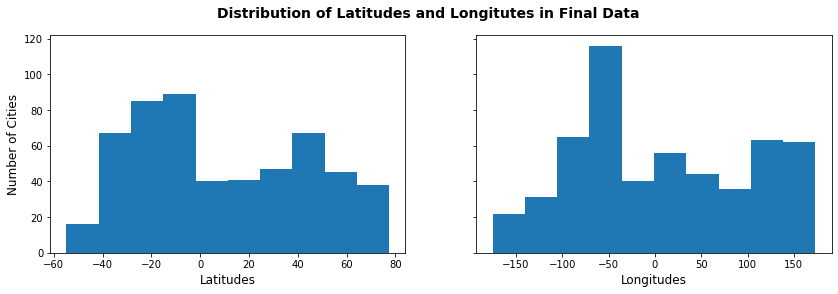

In [28]:
#due to location of land masses the actual lat and long distribution of sampled cities will never be uniform
fig, axs = plt.subplots(1,2, sharey = True, figsize =(14,4))
fig.suptitle("Distribution of Latitudes and Longitutes in Final Data", fontsize=14, fontweight="bold")
axs[0].hist(clean_city_data['Lat'])
axs[0].set_xlabel("Latitudes",fontsize=12)
axs[0].set_ylabel("Number of Cities",fontsize=12)
axs[1].hist(clean_city_data['Lng'])
axs[1].set_xlabel("Longitudes",fontsize=12)

plt.show()


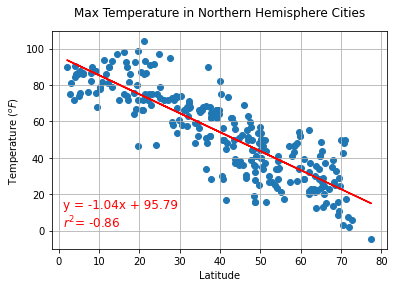

In [35]:
# Linear regression for Northern Hemisphere cities temperature vs latitude
northlat = northerncities['Lat']
northtemp = northerncities['Max Temp']
(ntslope, ntintercept, ntrvalue, ntpvalue, ntstderr) = stats.linregress(northlat, northtemp)
northtempregress = northlat * ntslope + ntintercept
ntline = f"y = {ntslope:.2f}x + {ntintercept:.2f}\n$r^{2}$= {ntrvalue:.2f}" 
plt.scatter(northlat,northtemp)
plt.plot(northlat,northtempregress,"r-")
plt.figtext(0.15,0.2,ntline,fontsize=12,color="red")
plt.title("Max Temperature in Northern Hemisphere Cities", pad=15)
plt.ylabel("Temperature ($^oF$)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure
plt.savefig("NorthTempvLatRegression.png")
#show plot
plt.show()

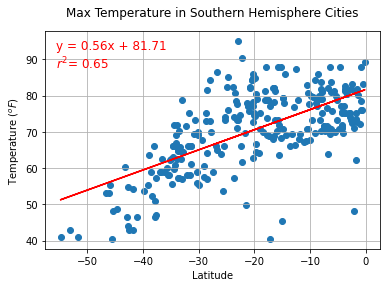

In [39]:
# Linear regression for Southern Hemisphere cities temperature vs latitude
southlat = southerncities['Lat']
southtemp = southerncities['Max Temp']
(stslope, stintercept, strvalue, stpvalue, ststderr) = stats.linregress(southlat, southtemp)
southtempregress = southlat * stslope + stintercept
stline = f"y = {stslope:.2f}x + {stintercept:.2f}\n$r^{2}$= {strvalue:.2f}" 
plt.scatter(southlat,southtemp)
plt.plot(southlat,southtempregress,"r-")
plt.figtext(0.15,0.75,stline,fontsize=12,color="red")
plt.title("Max Temperature in Southern Hemisphere Cities", pad=15)
plt.ylabel("Temperature ($^oF$)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure
plt.savefig("SouthTempvLatRegression.png")
#show plot
plt.show()

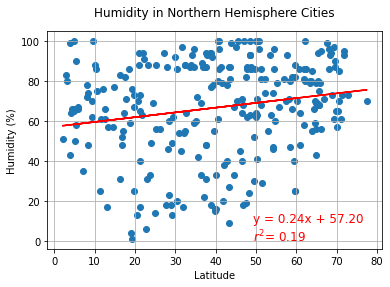

In [47]:
# Linear regression for Northern Hemisphere cities humidity vs latitude
northlat = northerncities['Lat']
northhum = northerncities['Humidity']
(nhslope, nhintercept, nhrvalue, nhpvalue, nhstderr) = stats.linregress(northlat, northhum)
northhumregress = northlat * nhslope + nhintercept
nhline = f"y = {nhslope:.2f}x + {nhintercept:.2f}\n$r^{2}$= {nhrvalue:.2f}" 
plt.scatter(northlat,northhum)
plt.plot(northlat,northhumregress,"r-")
plt.figtext(0.6,0.15,nhline,fontsize=12,color="red")
plt.title("Humidity in Northern Hemisphere Cities", pad=15)
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure
plt.savefig("NorthHumidvLatRegression.png")
#show plot
plt.show()

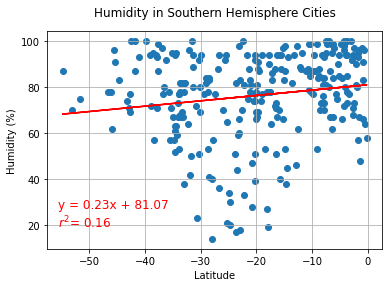

In [48]:
# Linear regression for Southern Hemisphere cities humidity vs latitude
southlat = southerncities['Lat']
southhum = southerncities['Humidity']
(shslope, shintercept, shrvalue, shpvalue, shstderr) = stats.linregress(southlat, southhum)
sorthhumregress = southlat * shslope + shintercept
shline = f"y = {shslope:.2f}x + {shintercept:.2f}\n$r^{2}$= {shrvalue:.2f}" 
plt.scatter(southlat,southhum)
plt.plot(southlat,sorthhumregress,"r-")
plt.figtext(0.15,0.2,shline,fontsize=12,color="red")
plt.title("Humidity in Southern Hemisphere Cities",pad=15)
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure
plt.savefig("SouthHumidvLatRegression.png")
#show plot
plt.show()

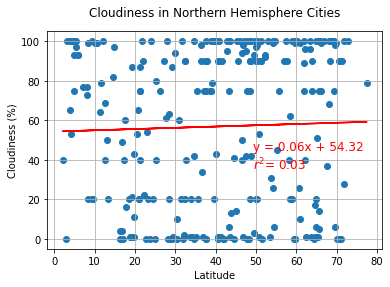

In [52]:
# Linear regression for Northern Hemisphere cities cloudiness vs latitude
northlat = northerncities['Lat']
northcloud = northerncities['Cloudiness']
(ncslope, ncintercept, ncrvalue, ncpvalue, ncstderr) = stats.linregress(northlat, northcloud)
northcloudregress = northlat * ncslope + ncintercept
ncline = f"y = {ncslope:.2f}x + {ncintercept:.2f}\n$r^{2}$= {ncrvalue:.2f}" 
plt.scatter(northlat,northcloud)
plt.plot(northlat,northcloudregress,"r-")
plt.figtext(0.6,0.4,ncline,fontsize=12,color="red")
plt.title("Cloudiness in Northern Hemisphere Cities", pad=15)
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure
plt.savefig("NorthCloudvLatRegression.png")
#show plot
plt.show()

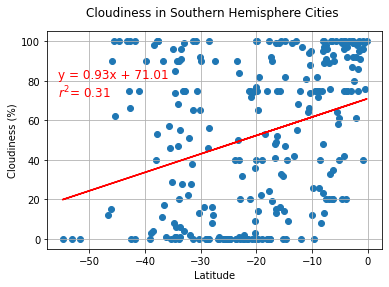

In [62]:
# Linear regression for Southern Hemisphere cities cloudiness vs latitude
southlat = southerncities['Lat']
southcloud = southerncities['Cloudiness']
(scslope, scintercept, scrvalue, scpvalue, scstderr) = stats.linregress(southlat, southcloud)
sorthcloudregress = southlat * scslope + scintercept
scline = f"y = {scslope:.2f}x + {scintercept:.2f}\n$r^{2}$= {scrvalue:.2f}" 
plt.scatter(southlat,southcloud)
plt.plot(southlat,sorthcloudregress,"r-")
plt.figtext(0.15,0.65,scline,fontsize=12,color="red")
plt.title("Cloudiness in Southern Hemisphere Cities ", pad=15)
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure
plt.savefig("SouthCloudvLatRegression.png")
#show plot
plt.show()

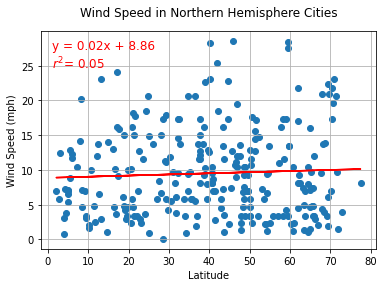

In [63]:
# Linear regression for Northern Hemisphere cities wind speed vs latitude
northlat = northerncities['Lat']
northwind = northerncities['Wind Speed']
(nwslope, nwintercept, nwrvalue, nwpvalue, nwstderr) = stats.linregress(northlat, northwind)
northwindregress = northlat * nwslope + nwintercept
nwline = f"y = {nwslope:.2f}x + {nwintercept:.2f}\n$r^{2}$= {nwrvalue:.2f}" 
plt.scatter(northlat,northwind)
plt.plot(northlat,northwindregress,"r-")
plt.figtext(0.15,0.75,nwline,fontsize=12,color="red")
plt.title("Wind Speed in Northern Hemisphere Cities",pad=15)
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure
plt.savefig("NorthWindvLatRegression.png")
#show plot
plt.show()

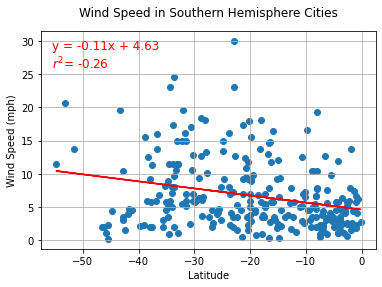

In [64]:
# Linear regression for Southern Hemisphere cities wind speed vs latitude
southlat = southerncities['Lat']
southwind = southerncities['Wind Speed']
(swslope, swintercept, swrvalue, swpvalue, swstderr) = stats.linregress(southlat, southwind)
sorthwindregress = southlat * swslope + swintercept
swline = f"y = {swslope:.2f}x + {swintercept:.2f}\n$r^{2}$= {swrvalue:.2f}" 
plt.scatter(southlat,southwind)
plt.plot(southlat,sorthwindregress,"r-")
plt.figtext(0.15,0.75,swline,fontsize=12,color="red")
plt.title("Wind Speed in Southern Hemisphere Cities",pad=15)
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure
plt.savefig("SouthWindvLatRegression.png")
#show plot
plt.show()